In [1]:
import scanpy as sc
import scanpy.external as sce
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pathlib import Path

# Settings
sc.settings.verbosity = 2
sc.set_figure_params(dpi=100, dpi_save=300, figsize=(6, 6), facecolor='white')

# Project paths
DATADIR = Path("..") / "data"
FIGDIR = Path("..") / "figures"
OBJDIR = Path("..") / "objects"

FIGDIR.mkdir(exist_ok=True)
OBJDIR.mkdir(exist_ok=True)

In [11]:
import warnings
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", RuntimeWarning)

In [10]:
sample_dirs = [d for d in DATADIR.iterdir() if d.is_dir()]
adatas = []
for sample_dir in sample_dirs:
    sample_name = sample_dir.name
    h5_files = list(sample_dir.glob("*.h5"))
    try:
        if h5_files:
            adata = sc.read_10x_h5(h5_files[0])
        else:
            feature_file = next(sample_dir.glob("features.tsv*"), None)
            if feature_file:
                df = pd.read_csv(feature_file, sep="\t", header=None)
                if df.shape[1] == 2:
                    df[2] = "Gene Expression"
                    df.to_csv(feature_file, sep="\t", header=False, index=False)
            adata = sc.read_10x_mtx(sample_dir, var_names='gene_ids', make_unique=True, cache=True)
    
        adata.var_names_make_unique()
        
        adata.obs['sample_id'] = sample_name
        adata.obs['group'] = "HS" if "HS" in sample_name else "CTRL"
        adatas.append(adata)

    except Exception as e:
        print(f"Failed to load {name}: {e}")


... reading from cache file cache/..-data-CTRL1-matrix.h5ad
... reading from cache file cache/..-data-CTRL6-matrix.h5ad
... reading from cache file cache/..-data-CTRL8-matrix.h5ad
reading ../data/CTRL9/matrix.h5
 (0:00:01)


/Users/leoqi/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/leoqi/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


... reading from cache file cache/..-data-CTRL7-matrix.h5ad
reading ../data/HS3/matrix.h5
 (0:00:02)


/Users/leoqi/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/leoqi/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


... reading from cache file cache/..-data-HS14-matrix.h5ad
... reading from cache file cache/..-data-CTRL13-matrix.h5ad
... reading from cache file cache/..-data-CTRL14-matrix.h5ad
... reading from cache file cache/..-data-HS13-matrix.h5ad
reading ../data/HS4/matrix.h5
 (0:00:01)


/Users/leoqi/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/leoqi/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


... reading from cache file cache/..-data-CTRL22-matrix.h5ad
... reading from cache file cache/..-data-CTRL23-matrix.h5ad
reading ../data/HS5/matrix.h5
 (0:00:01)


/Users/leoqi/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/leoqi/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


... reading from cache file cache/..-data-HS12-matrix.h5ad
... reading from cache file cache/..-data-CTRL15-matrix.h5ad
... reading from cache file cache/..-data-CTRL12-matrix.h5ad
... reading from cache file cache/..-data-HS15-matrix.h5ad
reading ../data/HS2/matrix.h5
 (0:00:02)


/Users/leoqi/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/leoqi/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


... reading from cache file cache/..-data-CTRL5-matrix.h5ad
... reading from cache file cache/..-data-CTRL2-matrix.h5ad
... reading from cache file cache/..-data-CTRL3-matrix.h5ad
... reading from cache file cache/..-data-CTRL4-matrix.h5ad
... reading from cache file cache/..-data-CTRL17-matrix.h5ad
... reading from cache file cache/..-data-HS7-matrix.h5ad
... reading from cache file cache/..-data-HS10-matrix.h5ad
... reading from cache file cache/..-data-HS17-matrix.h5ad
reading ../data/CTRL10/matrix.h5
 (0:00:01)


/Users/leoqi/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/leoqi/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


... reading from cache file cache/..-data-HS9-matrix.h5ad
... reading from cache file cache/..-data-CTRL19-matrix.h5ad
... reading from cache file cache/..-data-CTRL21-matrix.h5ad
... reading from cache file cache/..-data-HS18-matrix.h5ad
... reading from cache file cache/..-data-CTRL20-matrix.h5ad
... reading from cache file cache/..-data-CTRL18-matrix.h5ad
... reading from cache file cache/..-data-HS8-matrix.h5ad
... reading from cache file cache/..-data-CTRL11-matrix.h5ad
reading ../data/HS1/matrix.h5
 (0:00:01)


/Users/leoqi/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/leoqi/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


... reading from cache file cache/..-data-HS16-matrix.h5ad
... reading from cache file cache/..-data-HS11-matrix.h5ad
reading ../data/HS6/matrix.h5
 (0:00:01)


/Users/leoqi/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/leoqi/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


... reading from cache file cache/..-data-CTRL16-matrix.h5ad


/var/folders/ch/x0525t7s0sd2fws987wxtr7w0000gn/T/ipykernel_9023/2089068583.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  keys=[a.obs["sample_id"][0] for a in adatas],


In [16]:
import anndata as ad
adata = ad.concat(
    adatas,
    label='batch',
    keys=[a.obs["sample_id"][0] for a in adatas],
    index_unique='-',
    join='outer'
)
adata.X = np.nan_to_num(adata.X)

In [18]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:01)


extracting highly variable genes
`n_top_genes` > `adata.n_var`, returning all genes.
`n_top_genes` > `adata.n_var`, returning all genes.
`n_top_genes` > `adata.n_var`, returning all genes.
`n_top_genes` > `adata.n_var`, returning all genes.
`n_top_genes` > `adata.n_var`, returning all genes.
`n_top_genes` > `adata.n_var`, returning all genes.
`n_top_genes` > `adata.n_var`, returning all genes.
`n_top_genes` > `adata.n_var`, returning all genes.
`n_top_genes` > `adata.n_var`, returning all genes.
`n_top_genes` > `adata.n_var`, returning all genes.
`n_top_genes` > `adata.n_var`, returning all genes.
`n_top_genes` > `adata.n_var`, returning all genes.
`n_top_genes` > `adata.n_var`, returning all genes.
`n_top_genes` > `adata.n_var`, returning all genes.
`n_top_genes` > `adata.n_var`, returning all genes.
`n_top_genes` > `adata.n_var`, returning all genes.
`n_top_genes` > `adata.n_var`, returning all genes.
`n_top_genes` > `adata.n_var`, returning all genes.
`n_top_genes` > `adata.n_var`, 

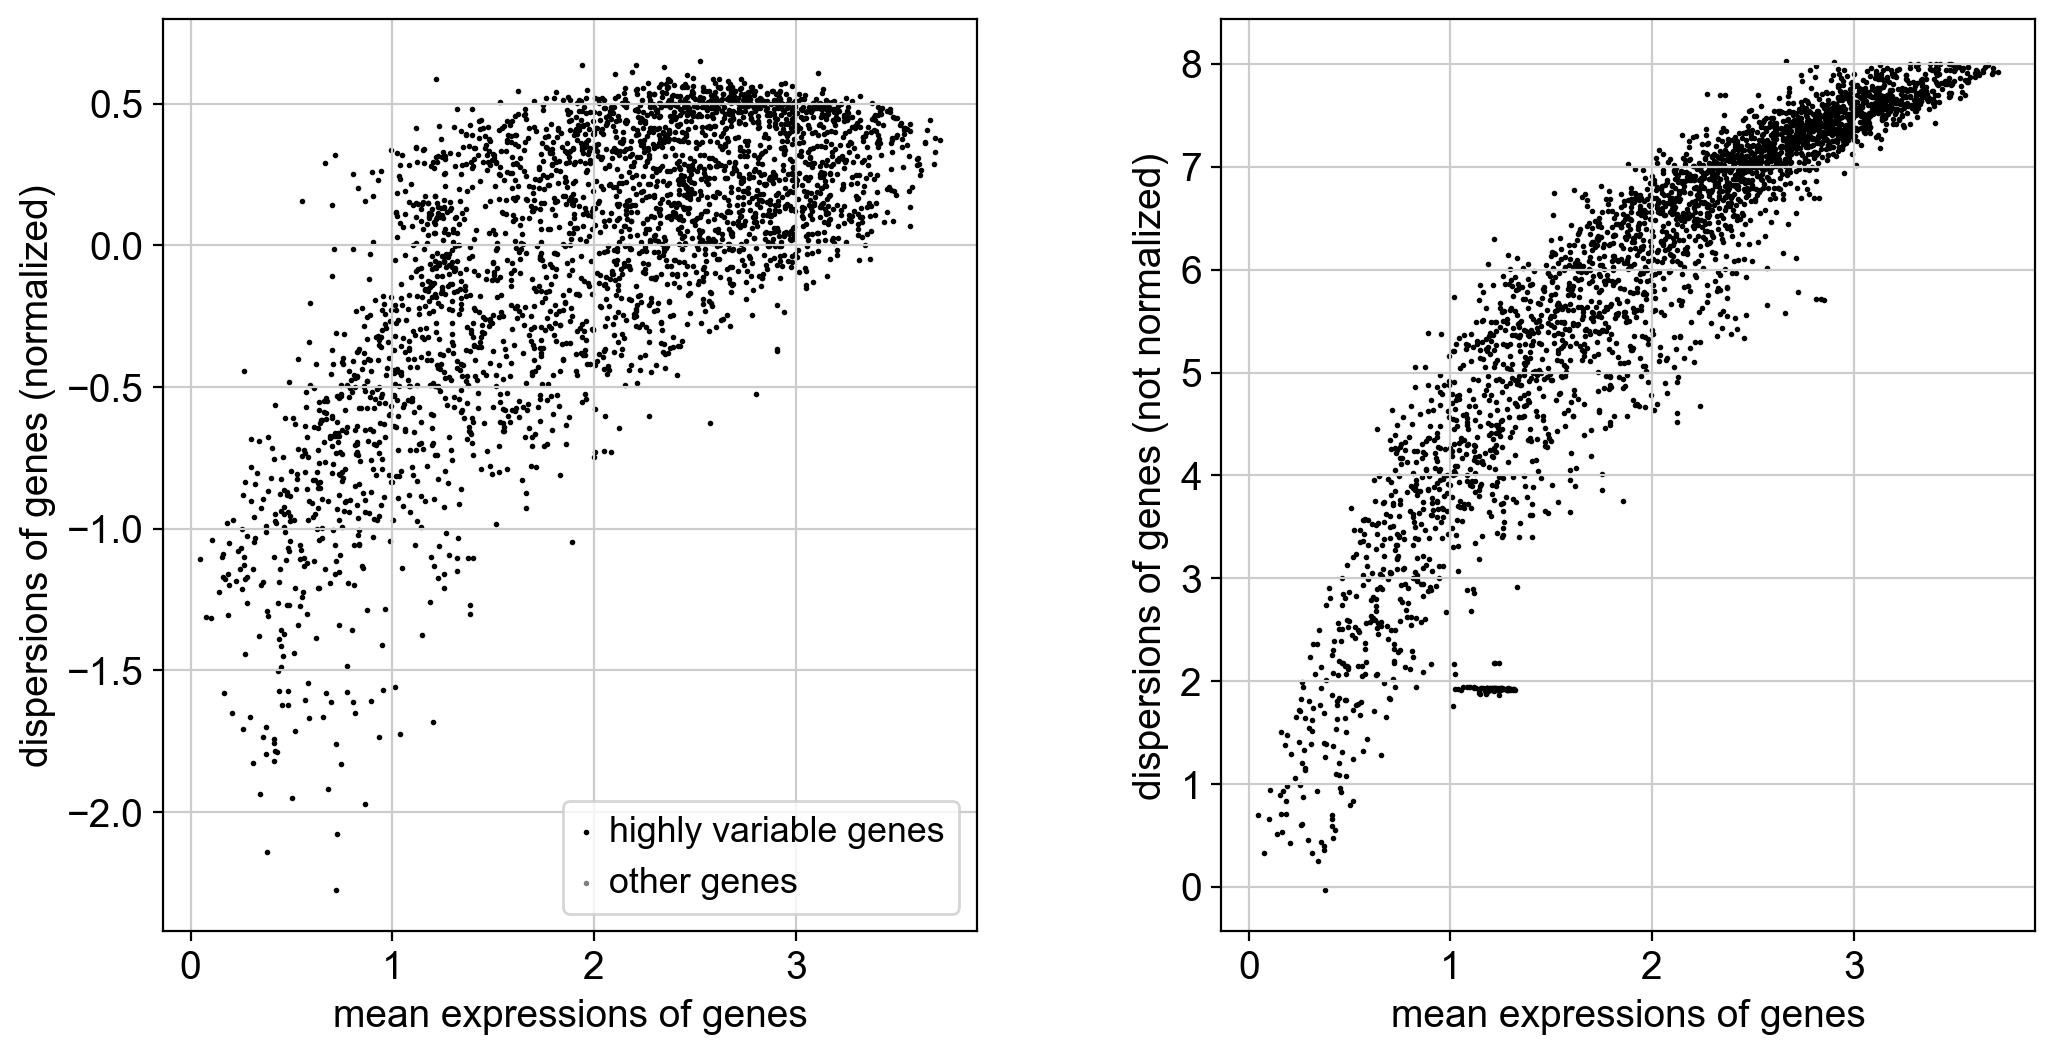

In [23]:
sc.pp.highly_variable_genes(adata, n_top_genes=3000, batch_key="sample_id")
sc.pl.highly_variable_genes(adata)
# This saves the original set of genes 
adata.raw = adata

adata = adata[:,adata.var.highly_variable]
sc.pp.scale(adata, max_value=10)

computing PCA
    with n_comps=50
    finished (0:01:16)


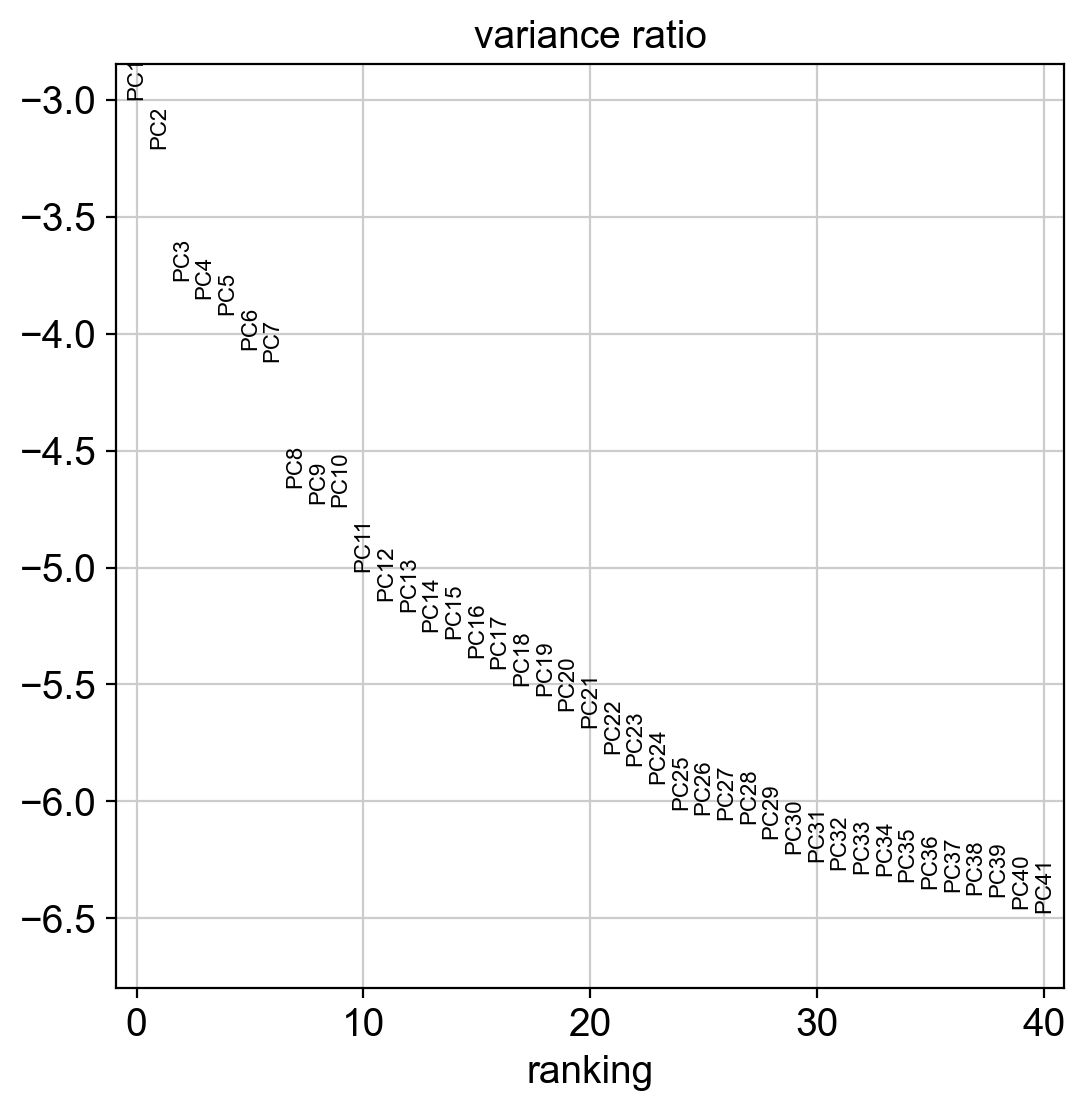

In [25]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=40, save='')

In [26]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=0.5)

computing neighbors
    using 'X_pca' with n_pcs = 40


python(11879) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Users/leoqi/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


    finished (0:00:26)
computing UMAP
    finished (0:01:56)
running Leiden clustering
    finished (0:00:10)


In [39]:
def multi_col_lgd(umap, ncol=2):
    legend = umap.legend(
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        ncol=ncol,
        prop={'size': 6}
    )
    legend.get_frame().set_linewidth(0.0)
    return legend

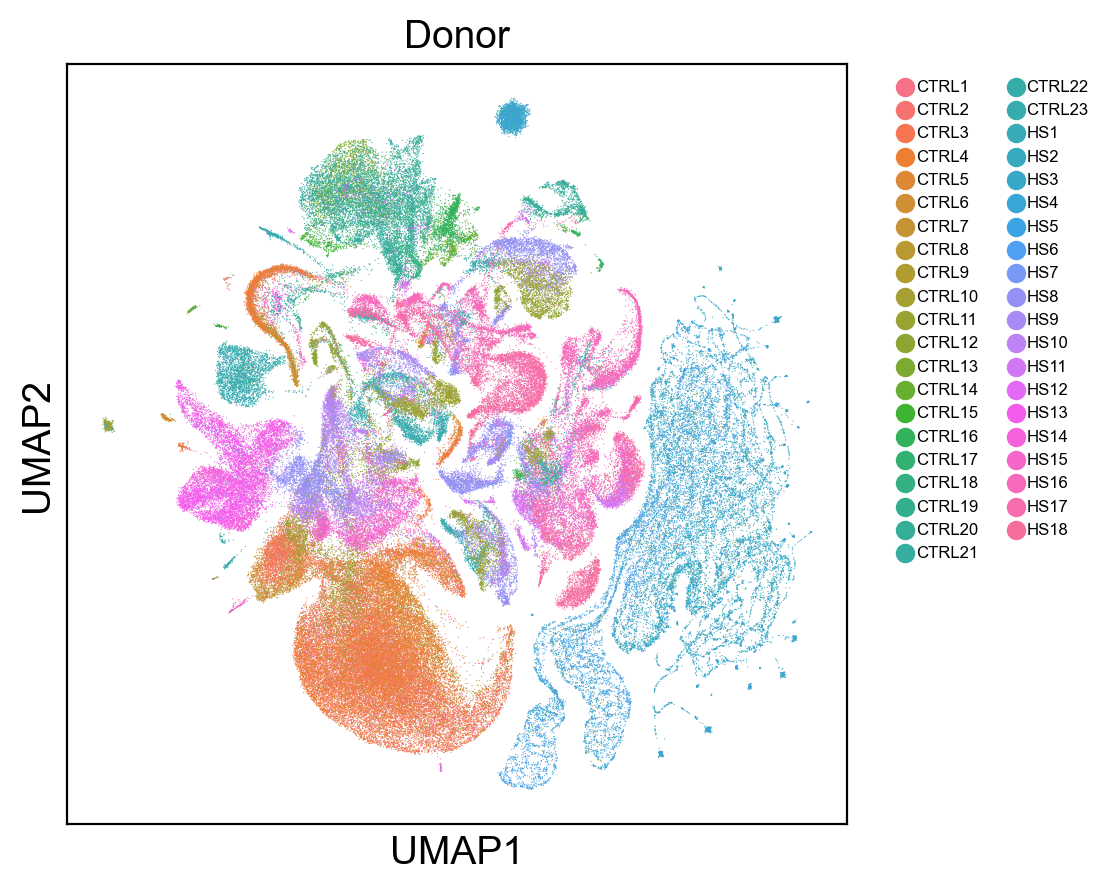

In [40]:
donor_umap = sc.pl.umap(adata, color=['sample_id'],
show=False, palette=sns.color_palette("husl", 41),
    legend_fontsize=6, frameon=True, title='Donor')

lgd = multi_col_lgd(donor_umap, ncol=2)

fig = donor_umap.get_figure()
fig.set_size_inches(5, 5)
fig.savefig(str(sc.settings.figdir) + '/umap_lgd_sample',
    dpi=400, bbox_extra_artists=(lgd,), bbox_inches='tight')

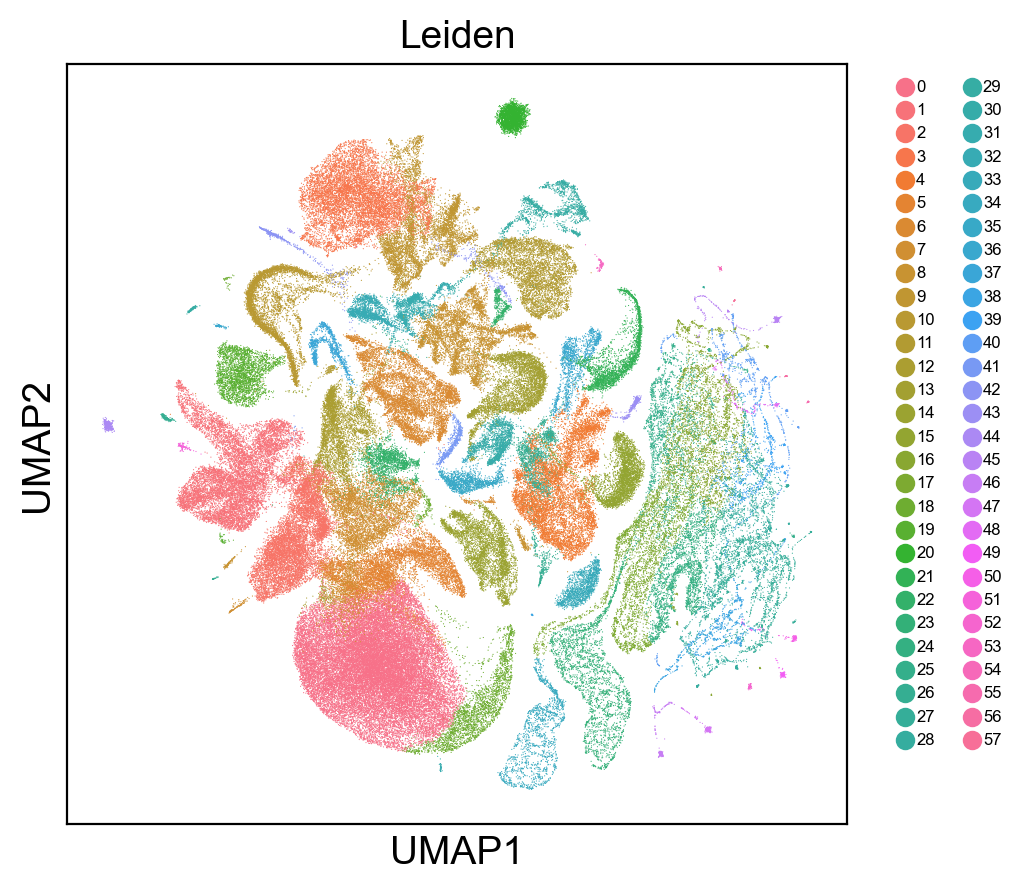

In [42]:
leiden_umap = sc.pl.umap(adata, color=['leiden'],
    show=False, palette=sns.color_palette("husl", 58),
legend_fontsize=6, frameon=True, title='Leiden')

lgd = multi_col_lgd(leiden_umap, ncol=2)

fig = leiden_umap.get_figure()
fig.set_size_inches(5, 5)
fig.savefig(str(sc.settings.figdir) + '/umap_lgd_leiden',
    dpi=400, bbox_extra_artists=(lgd,), bbox_inches='tight')

In [43]:
# Harmony Integration
import scanpy.external as sce
sce.pp.harmony_integrate(adata, 'sample_id')

ImportError: 
please install harmonypy:

	pip install harmonypy